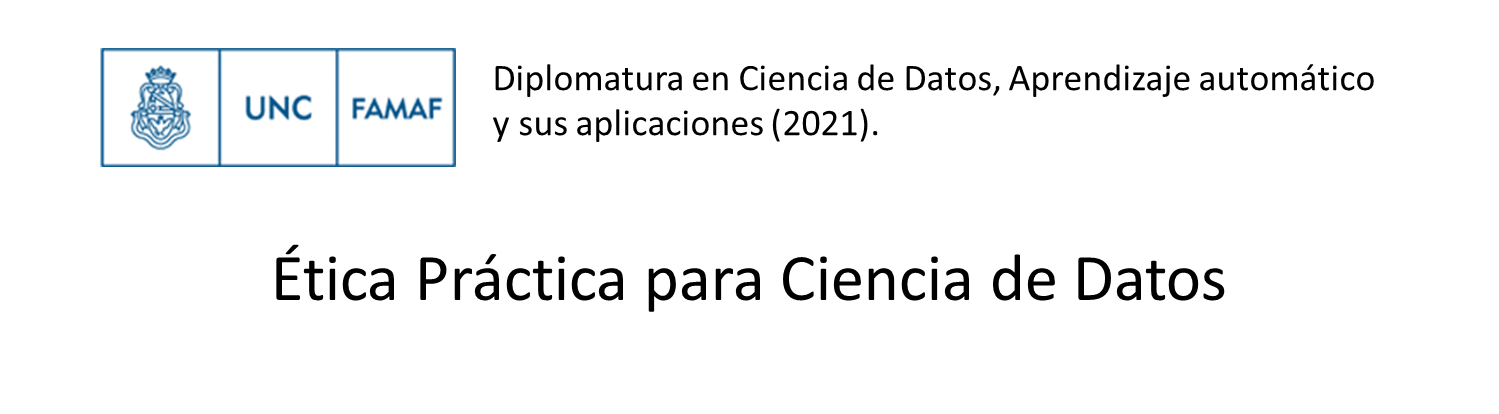

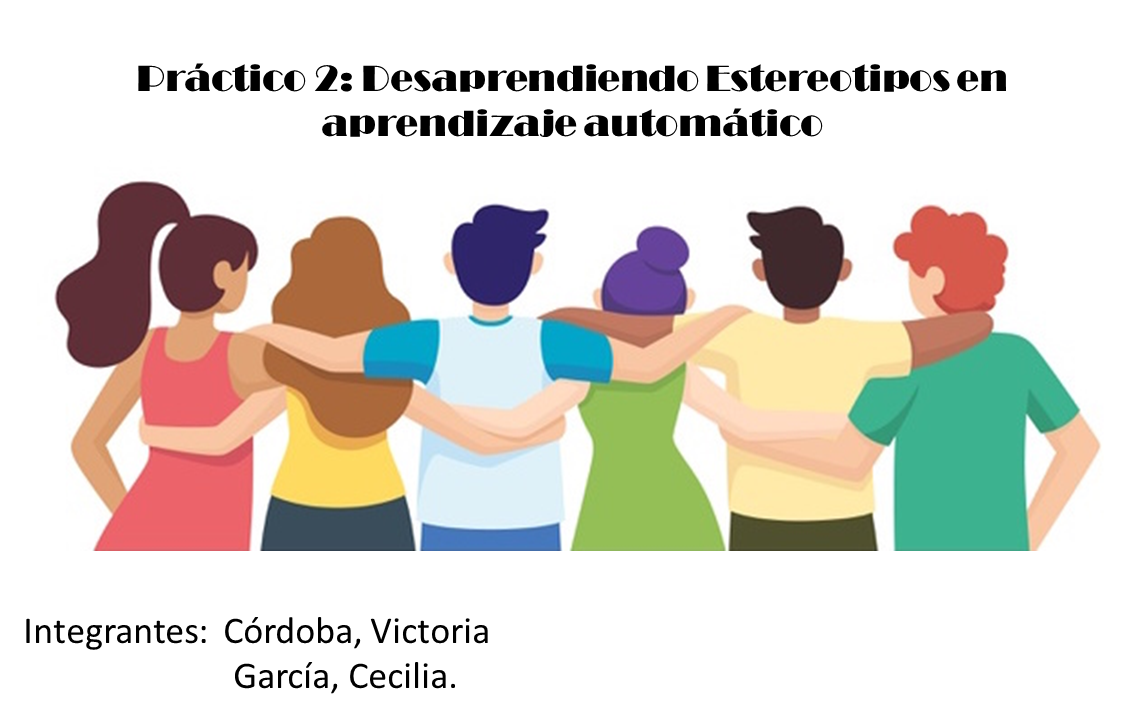

# **Practico 2 de Etica Práctica para Ciencia de Datos**

## Objetivo y consignas
Formalizar un atributo protegido para mitigar el sesgo sobre ese atributo. 

Piensen un atributo que se pueda representar como binario 
Representen ese eje en el espacio de embeddings, con dos extremos representados por una o más palabras.

Encuentren palabras que según sus valores deberían ser neutras con respecto a ese eje pero no lo son, muestren que no lo son con el gráfico de barras centrado en el 0 del eje binario obtenido en 2.

Neutralicen las palabras de 3. para que queden centradas en el 0 del eje binario, muestren cómo quedan centradas con el gráfico de barras.


###  Para este práctico seleccionamos el atributo *ORIGEN*: Latino y norteamericano. Debemos destacar que solo exploramos el género gramatical masculino a los fines de simplificar pero somos conscientes y hemos detectado que además del sesgo de origen existe sesgo relacionado con estereotipos de género que no será analizado aquí.


## 1- Instalación de librerías y modelos

In [ ]:
!pip install --user responsibly

In [ ]:
import responsibly

# deberían obtener '0.1.3'
responsibly.__version__

'0.1.3'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Descargar el modelo e importar librerías necesarias
import numpy as np
import logging

from numpy.linalg import norm
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, accuracy_score

logging.basicConfig(format='%(asctime)s : %(message)s', level=logging.INFO)

!wget -q http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.100k.vec.gz

!gzip -d -q fasttext-sbwc.100k.vec.gz
!ls

gzip: fasttext-sbwc.100k.vec already exists; do you wish to overwrite (y or n)? ^C
fasttext-sbwc.100k.vec	fasttext-sbwc.100k.vec.gz  sample_data


In [ ]:
we_es = KeyedVectors.load_word2vec_format('fasttext-sbwc.100k.vec')
# Esto normaliza los vectores
we_es.init_sims(replace=True)

2021-12-05 17:04:55,765 : loading projection weights from fasttext-sbwc.100k.vec
2021-12-05 17:05:28,293 : loaded (100000, 300) matrix from fasttext-sbwc.100k.vec
2021-12-05 17:05:28,294 : precomputing L2-norms of word weight vectors


In [ ]:
from numpy.testing import assert_almost_equal

length_vectors = norm(we_es.vectors_norm, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

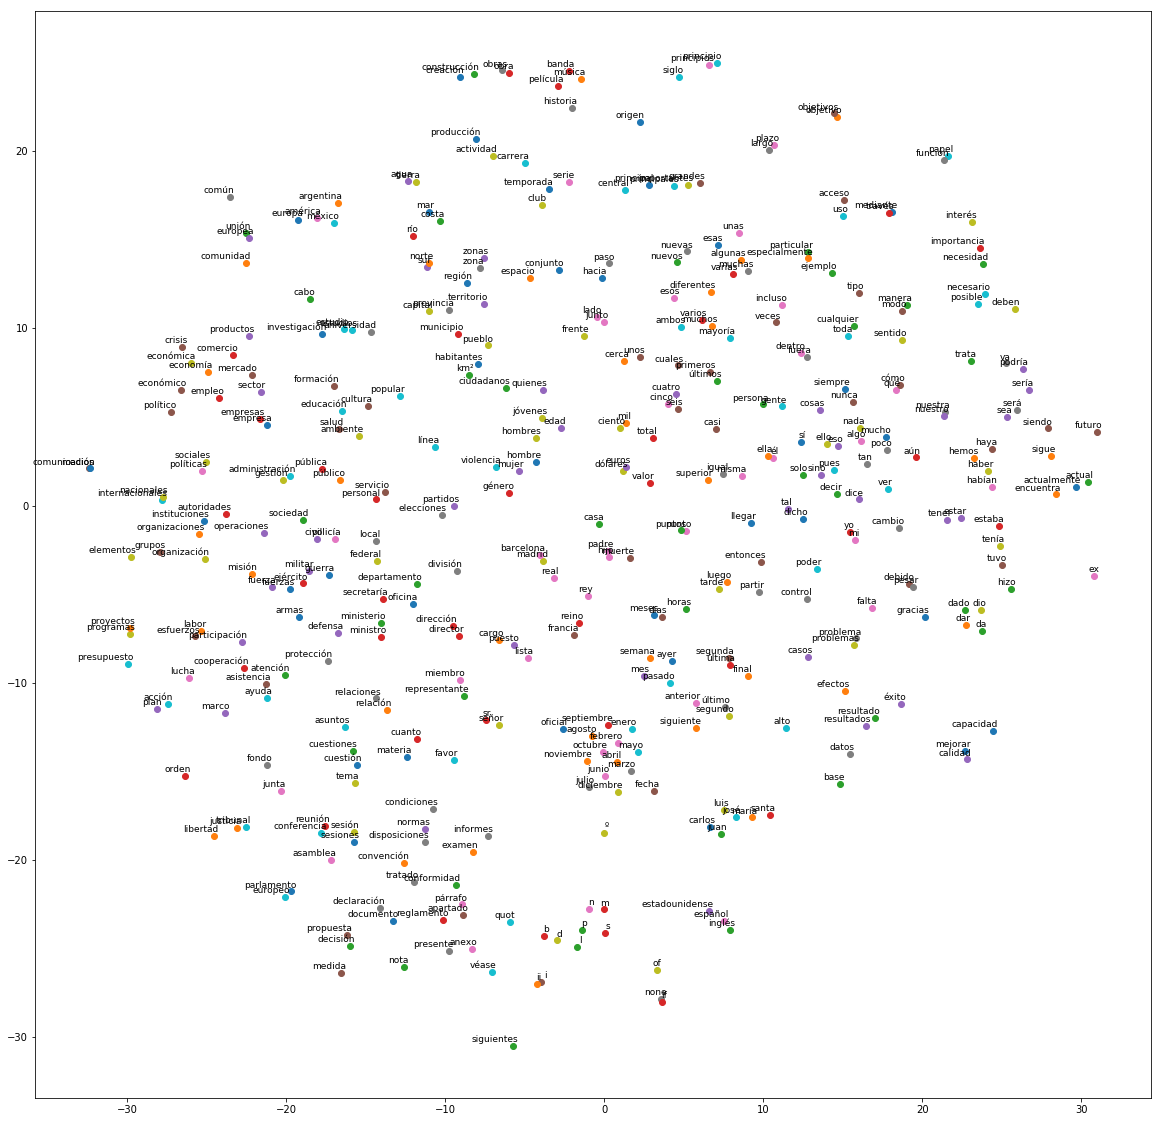

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# obtener las palabras más comunes en el corpus, entre la 200 y la 600
words = [word for word in we_es.index2word[200:600]]

# convertirlas a vector
embeddings = [we_es[word] for word in words]

#  T-SNE
words_embedded = TSNE(n_components=2, random_state=1).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=10)
plt.show()

## 2- Búsqueda de palabras con estereotipos de región de origen

Buscamos algunas palabras que tienen asociado algún sesgo de origen debido a esterotipos presentes en la sociedad. 

## Analogías de Vectores


In [ ]:
#Programador es a latino lo que norteamericano es a...
we_es.most_similar(positive=['programador', 'norteamericano'], negative=['latino'], topn=7)

[('desarrollador', 0.5722595453262329),
 ('planificador', 0.5196436643600464),
 ('estadounidense', 0.5100222229957581),
 ('hardware', 0.46675220131874084),
 ('controlador', 0.4645480811595917),
 ('programadores', 0.4587854743003845),
 ('software', 0.45407581329345703)]

In [ ]:
#Programador es a norteamericano lo que latino es a...
we_es.most_similar(positive=['programador','latino'], negative=['norteamericano'], topn=7)

[('latin', 0.47122132778167725),
 ('script', 0.4692305624485016),
 ('compilador', 0.4686959981918335),
 ('emacs', 0.44742149114608765),
 ('programadores', 0.44440290331840515),
 ('programadora', 0.44310706853866577),
 ('perl', 0.44013142585754395)]

In [ ]:
#taxista es a latino lo que norteamericano es a...
we_es.most_similar(positive=['taxista', 'norteamericano'], negative=['latino'], topn=7)  

[('camionero', 0.5943142175674438),
 ('pistolero', 0.5527602434158325),
 ('chofer', 0.5460237264633179),
 ('atracador', 0.5369771122932434),
 ('chófer', 0.5263991355895996),
 ('secuestrador', 0.5226744413375854),
 ('automovilista', 0.510912299156189)]

In [ ]:
#Taxista es a norteamericano lo que latino es a...
we_es.most_similar(positive=['taxista','latino'], negative=['norteamericano'], topn=7)

[('chofer', 0.4541813135147095),
 ('indigente', 0.43079859018325806),
 ('conductor', 0.42653220891952515),
 ('mesero', 0.4237372875213623),
 ('taxi', 0.4171498715877533),
 ('trailero', 0.4104403853416443),
 ('latin', 0.40292322635650635)]

Curiosamente, taxista parece estar asociado a criminalidad para el embedding *norteamericano*. Para *latino* aparece asociado indigente.

In [ ]:
we_es.most_similar(positive=['abogado', 'norteamericano'], negative=['latino'], topn=7)

[('letrado', 0.5782790184020996),
 ('abogada', 0.5172644853591919),
 ('penalista', 0.5007258653640747),
 ('abogados', 0.4744148850440979),
 ('empresario', 0.47405874729156494),
 ('estadounidense', 0.46809548139572144),
 ('bufete', 0.46790754795074463)]

In [ ]:
we_es.most_similar(positive=['abogado','latino'], negative=['norteamericano'], topn=7)

[('letrado', 0.5026971101760864),
 ('abogados', 0.4544431269168854),
 ('abogada', 0.4500323534011841),
 ('penalista', 0.4385814666748047),
 ('notario', 0.4243716597557068),
 ('jurista', 0.42111945152282715),
 ('litigante', 0.41879406571388245)]

In [ ]:
we_es.most_similar(positive=['empresario', 'norteamericano'], negative=['latino'], topn=6)

[('multimillonario', 0.5636559724807739),
 ('estadounidense', 0.530314564704895),
 ('banquero', 0.5270201563835144),
 ('millonario', 0.5197452902793884),
 ('filántropo', 0.5029117465019226),
 ('financista', 0.5012011528015137)]

In [ ]:
we_es.most_similar(positive=['empresario','latino'], negative=['norteamericano'], topn=6)

[('latin', 0.46166008710861206),
 ('empresaria', 0.41381269693374634),
 ('banquero', 0.39556077122688293),
 ('epíteto', 0.39272019267082214),
 ('latín', 0.3917650580406189),
 ('propietario', 0.39145782589912415)]

In [ ]:
we_es.most_similar(positive=['deportista', 'norteamericano'], negative=['latino'], topn=5)

[('atleta', 0.536981999874115),
 ('estadounidense', 0.5176539421081543),
 ('nadador', 0.49615031480789185),
 ('regatista', 0.4958048462867737),
 ('patinador', 0.4937841296195984)]

In [ ]:
we_es.most_similar(positive=['deportista','latino'], negative=['norteamericano'], topn=5)

[('atleta', 0.49739405512809753),
 ('gimnasta', 0.47190743684768677),
 ('judoka', 0.4618751108646393),
 ('jugadora', 0.4614689350128174),
 ('nadadora', 0.4459052085876465)]

In [ ]:
we_es.most_similar(positive=['deportista', 'norteamericana'], negative=['latina'], topn=5)

[('atleta', 0.529495894908905),
 ('estadounidense', 0.5203320980072021),
 ('nadadora', 0.5179422497749329),
 ('jugadora', 0.49430376291275024),
 ('triatleta', 0.49106019735336304)]

In [ ]:
we_es.most_similar(positive=['deportista','latina'], negative=['norteamericana'], topn=5)

[('atleta', 0.5130501389503479),
 ('esgrimista', 0.4899798035621643),
 ('gimnasta', 0.458202600479126),
 ('nadador', 0.4545239806175232),
 ('piragüismo', 0.44435158371925354)]

In [ ]:
we_es.most_similar(positive=['médico', 'norteamericano'], negative=['latino'], topn=7)

[('pediatra', 0.5591440796852112),
 ('ginecólogo', 0.5514475703239441),
 ('cardiólogo', 0.5492653846740723),
 ('cirujano', 0.5398439168930054),
 ('psiquiatra', 0.5336276292800903),
 ('anestesista', 0.5271625518798828),
 ('neurocirujano', 0.5259562730789185)]

In [ ]:
we_es.most_similar(positive=['médico','latino'], negative=['norteamericano'], topn=7)

[('medico', 0.5158408284187317),
 ('galeno', 0.487794429063797),
 ('medica', 0.46090513467788696),
 ('médicos', 0.45536381006240845),
 ('dioscórides', 0.4402109384536743),
 ('plantago', 0.4332932233810425),
 ('latín', 0.42854493856430054)]

In [ ]:
we_es.most_similar(positive=['músico', 'norteamericano'], negative=['latino'], topn=7)

[('estadounidense', 0.5622811913490295),
 ('compositor', 0.5483998656272888),
 ('pianista', 0.5284537076950073),
 ('guitarrista', 0.528075098991394),
 ('saxofonista', 0.52289879322052),
 ('multiinstrumentista', 0.5221115350723267),
 ('trompetista', 0.5197076201438904)]

In [ ]:
we_es.most_similar(positive=['músico','latino'], negative=['norteamericano'], topn=7)

[('compositor', 0.5950695276260376),
 ('cantante', 0.5734697580337524),
 ('arreglista', 0.5717265605926514),
 ('cantautor', 0.5636752247810364),
 ('solista', 0.5537995100021362),
 ('músical', 0.5422801971435547),
 ('compositora', 0.540379524230957)]

In [ ]:
we_es.most_similar(positive=['científico', 'norteamericano'], negative=['latino'], topn=7)

[('estadounidense', 0.4768926501274109),
 ('biólogo', 0.46410706639289856),
 ('investigador', 0.44682615995407104),
 ('científicos', 0.4422697424888611),
 ('científica', 0.4400980472564697),
 ('divulgador', 0.43871158361434937),
 ('estadunidense', 0.4364650547504425)]

In [ ]:
we_es.most_similar(positive=['científico','latino'], negative=['norteamericano'], topn=7)

[('latín', 0.471071720123291),
 ('plantago', 0.43741756677627563),
 ('etimológico', 0.42913779616355896),
 ('latin', 0.4286929965019226),
 ('etimológicamente', 0.4238470792770386),
 ('latinización', 0.421825647354126),
 ('humanístico', 0.4062620997428894)]

Latino no parece tener mucho sentido analizado con científico. Qué pasa si probamos con sudamericano?

In [ ]:
we_es.most_similar(positive=['científico', 'norteamericano'], negative=['sudamericano'], topn=7)

[('biólogo', 0.4837501347064972),
 ('divulgador', 0.4627031981945038),
 ('estadounidense', 0.4583871364593506),
 ('investigador', 0.45667004585266113),
 ('matemático', 0.4484871029853821),
 ('astrofísico', 0.43752408027648926),
 ('científicos', 0.43740352988243103)]

In [ ]:
we_es.most_similar(positive=['científico','sudamericano'], negative=['norteamericano'], topn=7)

[('científicas', 0.4529155492782593),
 ('conicet', 0.4480152130126953),
 ('conmebol', 0.4453502297401428),
 ('científicos', 0.44269442558288574),
 ('sudamericana', 0.4321453273296356),
 ('merconorte', 0.4199942648410797),
 ('biología', 0.41754239797592163)]

Mientras que científico y norteamericano se asocian con biólogo, astrofísico, matemático.. para sudamericano aparece CONMEBOL? 

In [ ]:
we_es.most_similar(positive=['albañil', 'norteamericano'], negative=['latino'], topn=7) #Pistolero???

[('soldador', 0.5174236297607422),
 ('jornalero', 0.5108252167701721),
 ('camionero', 0.5077195763587952),
 ('granjero', 0.4761430025100708),
 ('pistolero', 0.46893030405044556),
 ('electricista', 0.4683917462825775),
 ('tendero', 0.4579758644104004)]

In [ ]:
we_es.most_similar(positive=['albañil','latino'], negative=['norteamericano'], topn=7)

[('albañilería', 0.459887832403183),
 ('carpintero', 0.4294463098049164),
 ('canteros', 0.42265549302101135),
 ('albañiles', 0.41953808069229126),
 ('latín', 0.41707897186279297),
 ('latin', 0.41395342350006104),
 ('jornalero', 0.41231104731559753)]

In [ ]:
we_es.most_similar(positive=['doctora', 'latina'], negative=['norteamericana'], topn=7)

[('catedrática', 0.48916715383529663),
 ('vicerrectora', 0.45722073316574097),
 ('profesora', 0.45321667194366455),
 ('vicerrector', 0.43874049186706543),
 ('dra', 0.43638789653778076),
 ('doctor', 0.43294641375541687),
 ('sexóloga', 0.4325542747974396)]

In [ ]:
we_es.most_similar(positive=['doctora', 'norteamericana'], negative=['latina'], topn=7)

[('psicóloga', 0.5275810956954956),
 ('enfermera', 0.5229499340057373),
 ('bióloga', 0.5094054937362671),
 ('profesora', 0.5039944648742676),
 ('susan', 0.49897143244743347),
 ('antropóloga', 0.4929558038711548),
 ('abogada', 0.4823850095272064)]

Cuando probamos Doctora, y le restamos norteamericana OPS! aparece Sexóloga asociada con latina... Probamos con el masculino Doctor y tambien observamos algunas diferencias. 

In [ ]:
we_es.most_similar(positive=['doctor', 'latino'], negative=['norteamericano'], topn=5)

[('latin', 0.4714970588684082),
 ('doctores', 0.4530070126056671),
 ('honoris', 0.4420146346092224),
 ('latín', 0.4299914240837097),
 ('magister', 0.42368555068969727)]

In [ ]:
we_es.most_similar(positive=['doctor', 'norteamericano'], negative=['latino'], topn=5)

[('neurocirujano', 0.4892771244049072),
 ('doctora', 0.48088642954826355),
 ('dr', 0.47420069575309753),
 ('cirujano', 0.4726185202598572),
 ('profesor', 0.46034395694732666)]

Ahora probamos con otras palabras que no sean Profesiones para seguir explorando sesgos

In [ ]:
we_es.most_similar(positive=['belleza', 'latino'], negative=['norteamericano'], topn=7)

[('hermosura', 0.48906007409095764),
 ('elegancia', 0.4671136140823364),
 ('encanto', 0.4650849401950836),
 ('sensualidad', 0.4637315571308136),
 ('hermosa', 0.4596574902534485),
 ('bellezas', 0.4575435519218445),
 ('beldad', 0.45068737864494324)]

In [ ]:
we_es.most_similar(positive=['belleza', 'norteamericano'], negative=['latino'], topn=7)

[('estadounidense', 0.45738714933395386),
 ('norteamericana', 0.45386645197868347),
 ('bellezas', 0.4533817768096924),
 ('exuberancia', 0.4444802701473236),
 ('fascinación', 0.4372127950191498),
 ('incomparable', 0.4372028410434723),
 ('estadunidense', 0.43588173389434814)]

In [ ]:
we_es.most_similar(positive=['ignorancia', 'norteamericano'], negative=['latino'], topn=7)

[('incomprensión', 0.5262402892112732),
 ('indiferencia', 0.5221154689788818),
 ('hipocresía', 0.5169028043746948),
 ('estupidez', 0.5135402679443359),
 ('arrogancia', 0.5130146741867065),
 ('incompetencia', 0.5098124146461487),
 ('irracionalidad', 0.5030180215835571)]

In [ ]:
we_es.most_similar(positive=['ignorancia', 'latino'], negative=['norteamericano'], topn=7) 

[('pereza', 0.46085143089294434),
 ('superstición', 0.45896050333976746),
 ('latin', 0.440904438495636),
 ('incultura', 0.4397355318069458),
 ('latinos', 0.43970543146133423),
 ('vicio', 0.43552130460739136),
 ('vicios', 0.4350862503051758)]

Cuando a ignorancia le restamos norteamericano aparece pereza y vicio asociada con latino.. Cuando le restamos latino, en cambio aparece incomprensión e indiferencia

In [ ]:
we_es.most_similar(positive=['cultura', 'norteamericano'], negative=['latino'], topn=7)

[('norteamericana', 0.46737170219421387),
 ('estadounidense', 0.44499924778938293),
 ('culturas', 0.432342529296875),
 ('cultural', 0.42564857006073),
 ('civilización', 0.4114623963832855),
 ('incultura', 0.4082162380218506),
 ('ciencia', 0.3988732695579529)]

In [ ]:
we_es.most_similar(positive=['cultura', 'latino'], negative=['norteamericano'], topn=7)

[('vernácula', 0.44034135341644287),
 ('culturas', 0.43345576524734497),
 ('latinidad', 0.43305355310440063),
 ('latinas', 0.42801207304000854),
 ('lengua', 0.42317742109298706),
 ('arte', 0.40681028366088867),
 ('literatura', 0.40634167194366455)]

## 3- Dirección de origen


In [ ]:
from responsibly.we import BiasWordEmbedding

we_es_origen = BiasWordEmbedding(we_es, only_lower=True)

2021-12-05 17:08:17,659 : precomputing L2-norms of word weight vectors


### Para simplificar inicialmente tomaremos sólo el género masculino

In [ ]:
espacio_n = ['norteamericano','estadounidense', 'canadiense']
espacio_l = ['sudamericano','suramericano', 'latino', 'colombiano','argentino', 'boliviano','brasilero','venezolano', 'mexicano','chileno','paraguayo','uruguayo' ]

we_es_origen._identify_direction('Latino', 'Norteamericano',
                                          definitional=(espacio_l, espacio_n),
                                          method='sum')

In [ ]:
origen_direction_es = we_es_origen.direction

origen_direction_es /= norm(origen_direction_es)

In [ ]:
origen_direction_es @ we_es.word_vec('empresario')

0.02490986

In [ ]:
origen_direction_es @ we_es.word_vec('abogado')

0.044528328

In [ ]:
origen_direction_es @ we_es.word_vec('futbolista')

0.24293083

In [ ]:
origen_direction_es @ we_es.word_vec('taxista')

0.033891544

In [ ]:
origen_direction_es @ we_es.word_vec('médico')

0.058177873

In [ ]:
origen_direction_es @ we_es.word_vec('programador')

-0.08629675

In [ ]:
origen_direction_es @ we_es.word_vec('doctor')

0.02818842

In [ ]:
origen_direction_es @ we_es.word_vec('profesor')

0.010812568

In [ ]:
origen_direction_es @ we_es.word_vec('científico')

-0.03565232

In [ ]:
origen_direction_es @ we_es.word_vec('músico')

0.037092935

In [ ]:
origen_direction_es @ we_es.word_vec('arquitecto')

0.055891145

In [ ]:
origen_direction_es @ we_es.word_vec('artista')

0.011629392

In [ ]:
origen_direction_es @ we_es.word_vec('actor')

-0.008700279

In [ ]:
origen_direction_es @ we_es.word_vec('deportista')

0.041459344

In [ ]:
origen_direction_es @ we_es.word_vec('seguridad')

-0.013168187

In [ ]:
origen_direction_es @ we_es.word_vec('violencia')

0.030300427

In [ ]:
origen_direction_es @ we_es.word_vec('ilegalidad')

0.103675894

In [ ]:
origen_direction_es @ we_es.word_vec('vagancia')

0.12696221

In [ ]:
origen_direction_es @ we_es.word_vec('ignorancia')

0.033762775

In [ ]:
origen_direction_es @ we_es.word_vec('conocimiento')

-0.003761684

In [ ]:
origen_direction_es @ we_es.word_vec('éxito')

-0.03584592

In [ ]:
origen_direction_es @ we_es.word_vec('fracaso')

-0.04505818

#### Observamos que efectivamente existe un sesgo de profesiones y algunos términos para el atributo origen/región de procedencia. La palabra futbolista por ejemplo aparece bastante sesgado hacia el origen LATINO. Casi todas las profesiones que analizamos aparecen sesgadas hacia el origen latino a excepcion de programador, científico y actor. Curiosamente, otras palabras que aparecen bastante sesgadas hacia latino incluyen ilegalidad y vagancia.

## 4- Medición directa del sesgo de origen
#### sobre algunas profesiones que consideramos deberíamos mitigar

In [ ]:
profesiones = [
    'chofer',
    'columnista',
    'publicista',
    'asistente',
    'taxista',
    'psiquiatra',
    'policia',
    'futbolista',
    'dentista',
    'artista',
    'florista',
    'docente',
    'periodista',
    'electricista',
    'economista',
    'atleta',
    'terapeuta',
    'deportista',
    'piloto',
    'modelo',
    'estudiante',
    'comerciante',
    'obrero',
    'panadero',
    'chef',
    'cantante',
    'militar',
    'programador',
    'científico',
    'agricultor',
    'plomero',
    'mecánico',
    'repartidor',
    'doctor',
    'vendedor',
    'secretario',
    'pescador',
    'peluquero',
    'jardinero',
    'albañil',
    'abogado', 
    'arquitecto',
    'contador',
    'farmacéutico',
    'ingeniero', 
    'médico',
    'empresario', 
    'informático'
]

2021-12-05 17:08:46,183 : NumExpr defaulting to 2 threads.


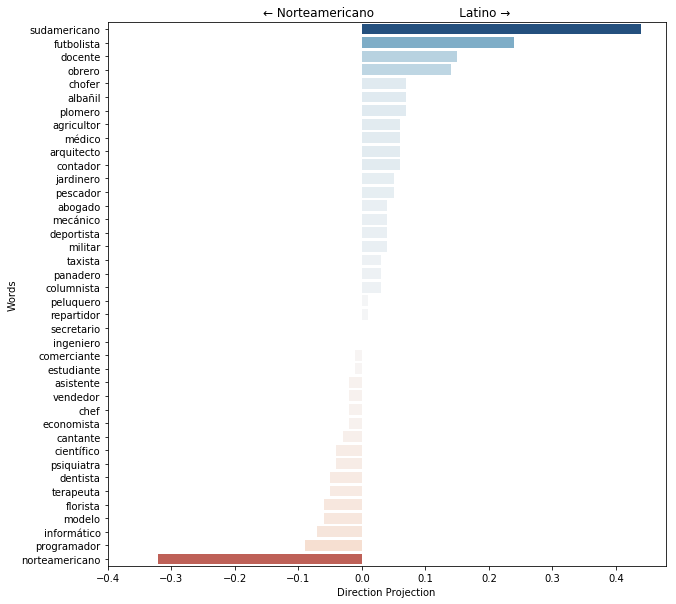

In [ ]:
#Observamos el sesgo de profesiones en un gráfico

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen.plot_projection_scores(
    profesiones + espacio_l[:1] + espacio_n[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
print("El valor de sesgo para profesiones es:", we_es_origen.calc_direct_bias(profesiones, c=None))

El valor de sesgo para profesiones es: 0.04462593197604292


Programador e informático son las profesiones que tienen mayor sesgo para el atributo norteamericano, mientras que futbolista, docente y albañil son las de mayor sesgo que se asocian al atributo Latino.

In [ ]:
adjetivos = [
    'ladrón',
    'asesino',
    'rico',
    'pobre',
    'ilegal',
    'seguro',
    'peligroso',
    'legal',
    'ignorante',
    'inmigrante',
    'emigrante',
    'convicto',
    'violento',
    'violador',
    'exitoso',
    'fracasado',
    'honesto',
    'confiable',
    'irrespetuoso',
    'respetuoso',
    'criminal',
    'bello',
    'hermoso',
    'feo',
]

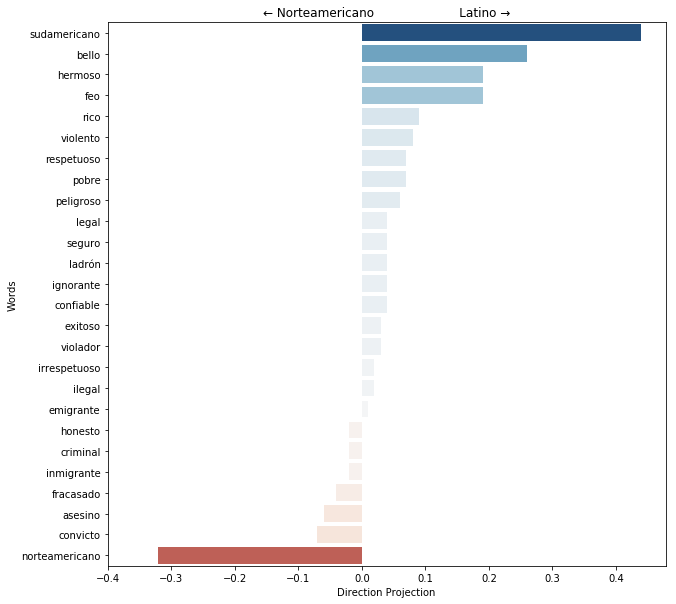

In [ ]:
#Observamos el sesgo en un gráfico

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen.plot_projection_scores(
    adjetivos + espacio_l[:1] + espacio_n[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
print("El valor de sesgo para adjetivos es:", we_es_origen.calc_direct_bias(adjetivos, c=None))

El valor de sesgo para adjetivos es: 0.06399588872833799


Observamos un valor de sesgo mayor para adjetivos que para profesiones. Curiosamente la mayor parte de este sesgo está dado por los adjetivos, hermoso, bello, y feo los cuales están bastante sesgados hacia *latino*.
Convicto, asesino y fracasado son algunas de las palabras sesgadas hacia *norteamericano*

In [ ]:
verbos = [ 
          'comprar',
          'vender',
          'dormir',
          'despertar',
          'migrar',
          'soñar',
          'llorar',
          'gritar',
          'hablar',
          'preguntar',
          'pensar',
          'inventar',
          'bailar',
          'cantar',
          'violentar',
          'violar',
          'desarrollar',
          'cocinar',
          'sentir',
          'jugar',
          'dormir',
          'bordar',
          'tejer',
          'razonar',
          'asesinar',
          'argumentar',
          'cursar',
          'trabajar',
          'programar',
          'robar',
]

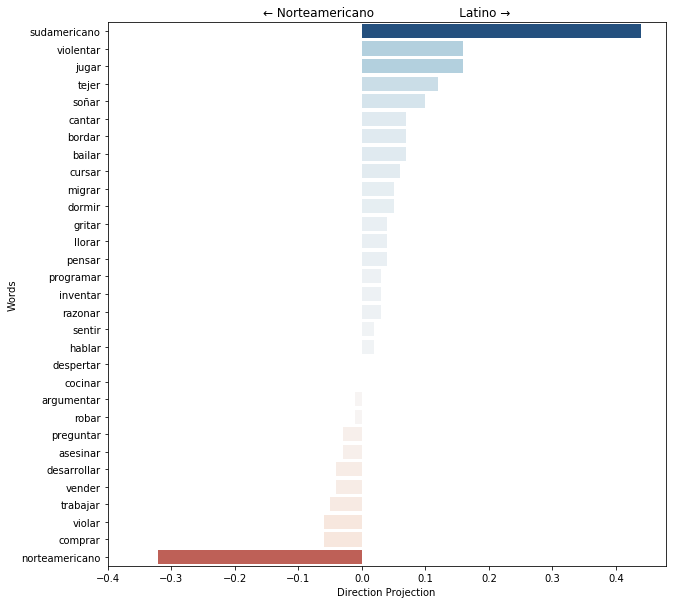

In [ ]:
#Observamos el sesgo en un gráfico

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen.plot_projection_scores(
    verbos + espacio_l[:1] + espacio_n[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
print("El valor de sesgo para verbos es:", we_es_origen.calc_direct_bias(verbos, c=None))

El valor de sesgo para verbos es: 0.05173713212522368


Si consideramos verbos que deberian ser independientes del lugar o región de origen vemos que la mayoría de losverbos analizados estan sesgados hacia latino. En particular los verbos mas asociados al origen *latino* son "violentar","jugar","tejer","soñar" mientras que los verbos más sesgados hacia *norteamericano* incluyen "comprar", "violar" y "trabajar".

In [ ]:
sustantivos_abstractos = [
'éxito',
'fracaso',
'inteligencia',
'belleza',
'humildad',
'sabiduría',
'poder',
'cariño',
'bondad',
'alegría',
'ambición',
'amabilidad',
'paciencia',
'popularidad',
'fama',
'generosidad',
'honestidad',
'maldad',
'soberbia',
'violencia',
'necesidad',
]


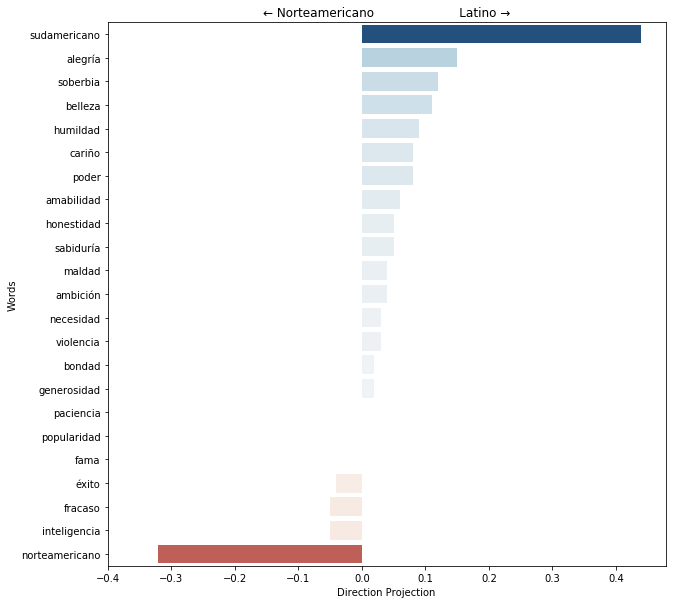

In [ ]:
#Observamos el sesgo en un gráfico

import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen.plot_projection_scores(
    sustantivos_abstractos + espacio_l[:1] + espacio_n[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
print("El valor de sesgo para verbos es:", we_es_origen.calc_direct_bias(sustantivos_abstractos, c=None))

El valor de sesgo para verbos es: 0.05303511985610904


De nuevo, observamos un sesgo hacia el origen *Latino* para la mayoría de los sustantivos abstractos considerados. Alegría, soberbia y belleza son los sustantivos más sesgados hacia *Latino*, mientras que los sustantivos sesgados hacia norteamericano incluyen "inteligencia", "fracaso" y "éxito".

## 5- Mitigación del sesgo de origen

In [ ]:
#Mitigamos profesiones con método "neutralize" y observamos el nuevo valor de sesgo
palabras_neutras = profesiones+ adjetivos + verbos + sustantivos_abstractos

we_es_origen_debias = we_es_origen.debias(method = 'neutralize' , neutral_words= palabras_neutras, inplace=False)
print("El nuevo valor de sesgo neutralizado es:", we_es_origen_debias.calc_direct_bias(palabras_neutras, c=None))

2021-12-05 17:26:59,574 : precomputing L2-norms of word weight vectors
2021-12-05 17:27:01,161 : precomputing L2-norms of word weight vectors


El nuevo valor de sesgo neutralizado es: 5.3197981011299155e-09


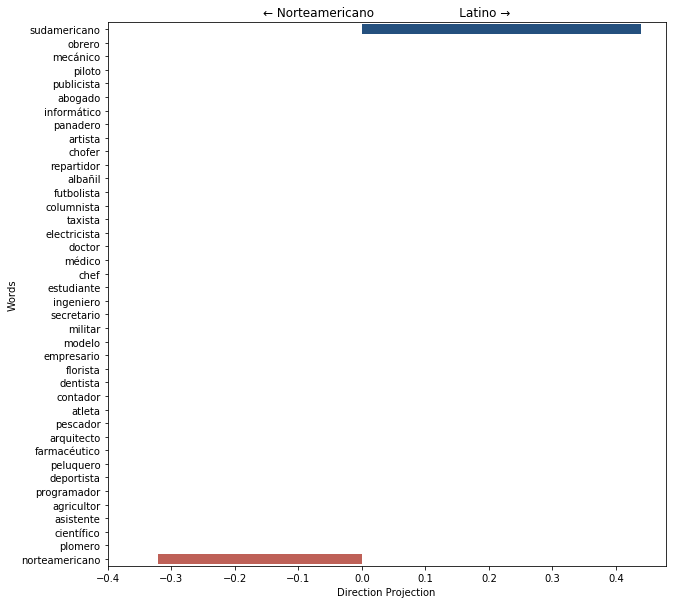

In [ ]:
#Volvemos a graficar las profesiones con los nuevos valores neutralizados
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen_debias.plot_projection_scores(
    profesiones + espacio_n[:1] + espacio_l[:1],
    n_extreme=20,
    ax=ax);

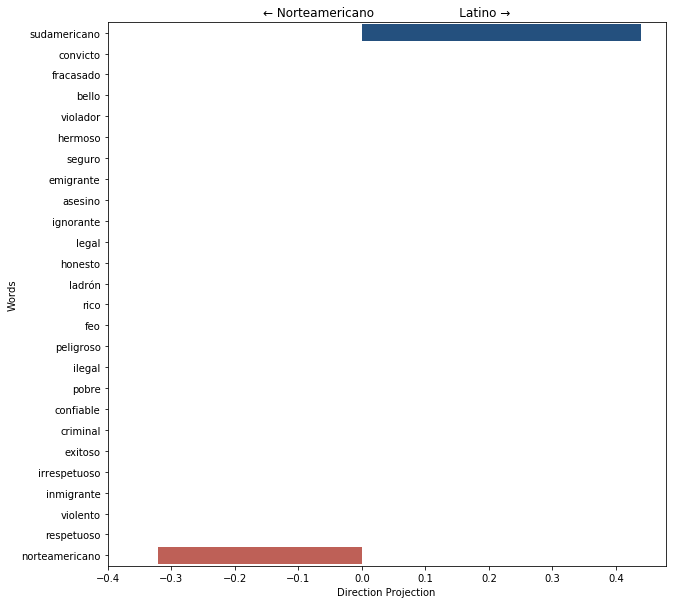

In [ ]:
#Volvemos a graficar los adjetivos con los nuevos valores
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen_debias.plot_projection_scores(
    adjetivos + espacio_n[:1] + espacio_l[:1],
    n_extreme=20,
    ax=ax);

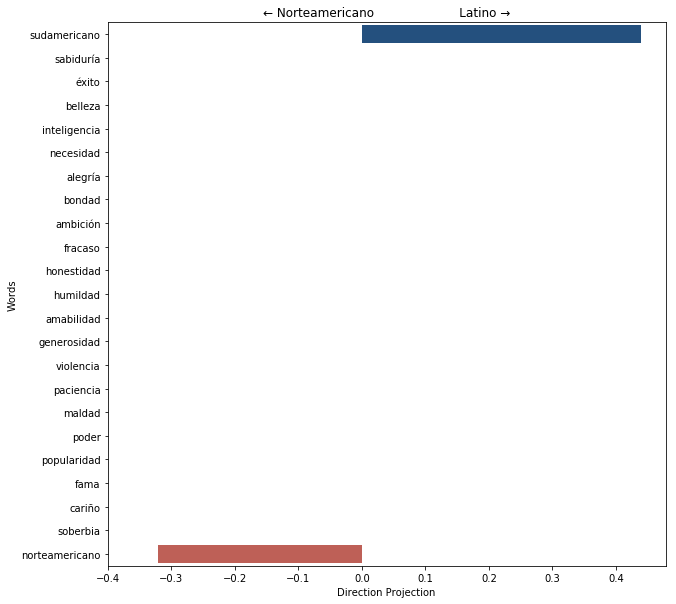

In [ ]:
#Graficamos nuevos valores para sustantivos_abstractos
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen_debias.plot_projection_scores(
    sustantivos_abstractos + espacio_n[:1] + espacio_l[:1],
    n_extreme=20,
    ax=ax);

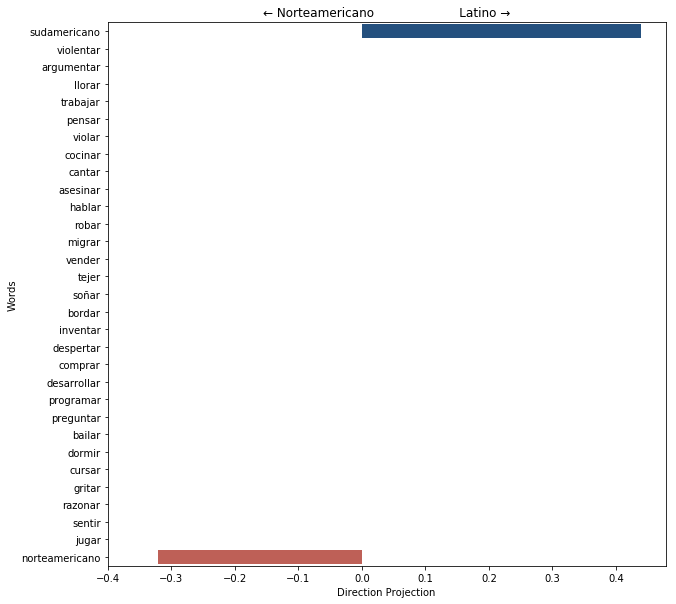

In [ ]:
#Graficamos nuevos valores neutralizados para verbos
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_origen_debias.plot_projection_scores(
    verbos + espacio_n[:1] + espacio_l[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
#Chequeamos valores de sesgo pre- y post-mitigación 
print('criminal:',
      'pre-mitigación = ', we_es_origen.model['criminal'] @ we_es_origen.direction,
      'post-mitigación = ', we_es_origen_debias.model['criminal'] @ we_es_origen_debias.direction)

criminal: pre-mitigacion =  -0.019603215 pre-mitigacion =  -6.2791514e-09


In [ ]:
print('programador:',
      'pre-mitigación = ', we_es_origen.model['programador'] @ we_es_origen.direction,
      'post-mitigación = ', we_es_origen_debias.model['programador'] @ we_es_origen_debias.direction)

programador: pre-mitigación =  -0.08629675 post-mitigación =  -8.338247e-09
